Objetivo: Desenvolver um modelo de classificação supervisionada utilizando o algoritmo Árvore de Decisão para prever o desfecho clínico (Cura ou Óbito) de pacientes hospitalizados com Síndrome Respiratória Aguda Grave (SRAG).de risco.

Equipe:

Marques Herminio

Davi Parante


In [ ]:
# Instalação da biblioteca gdown
!pip install -U gdown


In [ ]:
#  Download dos dados SRAG via Google Drive público

import gdown
import os

os.makedirs('Dados', exist_ok=True)

arquivos_drive = {
    'INFLUD19.parquet': '1AZdnTdJrlWurVdeilVVv7svGbfa6_uKa',
    'INFLUD20.parquet': '1TbRazVvlZYkcRZ6E7JPRHAP-_nhs2vnv',
    'INFLUD21.parquet': '1_mc5U3dWG4v2Byqug--QdDZSFc9OVRag',
    'INFLUD22.parquet': '1JTFxGo75-06eDHijLdB-W8krzaMaFSQc',
    'INFLUD23.parquet': '1K5dhMIn81IClZaGJ8NdzpNHXahUo_Z5w',
    'INFLUD24.parquet': '10rcV5cPAJMsXJlax6fOSLx2VIEnMMg-U'
}

for nome, file_id in arquivos_drive.items():
    url = f'https://drive.google.com/uc?id={file_id}'
    output = f'Dados/{nome}'
    if not os.path.exists(output):
        gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1AZdnTdJrlWurVdeilVVv7svGbfa6_uKa
To: /content/Dados/INFLUD19.parquet
100%|██████████| 3.20M/3.20M [00:00<00:00, 207MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TbRazVvlZYkcRZ6E7JPRHAP-_nhs2vnv
To: /content/Dados/INFLUD20.parquet
100%|██████████| 78.9M/78.9M [00:00<00:00, 178MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1_mc5U3dWG4v2Byqug--QdDZSFc9OVRag
From (redirected): https://drive.google.com/uc?id=1_mc5U3dWG4v2Byqug--QdDZSFc9OVRag&confirm=t&uuid=c72631e7-3082-4d52-b76c-64473b87d6d0
To: /content/Dados/INFLUD21.parquet
100%|██████████| 115M/115M [00:00<00:00, 140MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JTFxGo75-06eDHijLdB-W8krzaMaFSQc
To: /content/Dados/INFLUD22.parquet
100%|██████████| 40.3M/40.3M [00:00<00:00, 111MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1K5dhMIn81IClZaGJ8NdzpNHXahUo_Z5w
To: /content/Dados/INFLUD23.parquet
100%|██████████| 20.6M/20.6M [00:00<

In [ ]:
# Leitura e concatenação dos dados SRAG

import pandas as pd

path = 'Dados'

dfs = []

for arq in os.listdir(path):
    if arq.endswith('.parquet'):
        print(f'Lendo arquivo: {arq}')
        df_temp = pd.read_parquet(os.path.join(path, arq))

        # Amostragem para evitar estouro de RAM (20%)
        df_temp = df_temp.sample(frac=0.2, random_state=42)

        dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

df.shape


Lendo arquivo: INFLUD19.parquet
Lendo arquivo: INFLUD24.parquet
Lendo arquivo: INFLUD21.parquet
Lendo arquivo: INFLUD23.parquet
Lendo arquivo: INFLUD20.parquet
Lendo arquivo: INFLUD22.parquet


(821913, 194)

In [ ]:
# Verificação inicial dos dados

df.head()


,NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,...,VG_OMS,VG_OMSOUT,VG_LIN,VG_MET,VG_METOUT,VG_DTRES,VG_ENC,VG_REINF,VG_CODEST,REINF
0,315632802957,2019-07-15,29,2019-07-11,28,RJ,None,None,NOVA IGUACU,330350,...,None,None,None,None,None,None,None,None,None,None
1,315629442015,2019-07-06,27,2019-06-30,27,MS,NRS DE AQUIDAUANA,1964,DOIS IRMAOS DO BURITI,500348,...,None,None,None,None,None,None,None,None,None,None
2,315602613086,2019-05-23,21,2019-05-21,21,RJ,None,None,SAQUAREMA,330550,...,None,None,None,None,None,None,None,None,None,None
3,315532604264,2019-03-12,11,2019-03-06,10,PI,4 GRS TERESINA,1883,TERESINA,221100,...,None,None,None,None,None,None,None,None,None,None
4,315705409877,2019-10-04,40,2019-10-01,40,PE,001,1497,RECIFE,261160,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Montagem do Google Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns


Index(['NU_NOTIFIC', 'DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI',
       'SG_UF_NOT', 'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT',
       ...
       'VG_OMS', 'VG_OMSOUT', 'VG_LIN', 'VG_MET', 'VG_METOUT', 'VG_DTRES',
       'VG_ENC', 'VG_REINF', 'VG_CODEST', 'REINF'],
      dtype='object', length=194)

In [ ]:
df['EVOLUCAO'].value_counts(dropna=False).head(10)


,count
EVOLUCAO,
1,395147
1.0,154918
2,116974
2.0,62731
None,59255
9,13447
3,11112
9.0,4817
3.0,3512


In [ ]:
# Seleção das variáveis relevantes do projeto

colunas_projeto = [
    'EVOLUCAO','CS_SEXO','CS_RACA',
    'FEBRE','TOSSE','GARGANTA','DISPNEIA',
    'SATURACAO','DESC_RESP','FATOR_RISC',
    'CARDIOPATI','DIABETES','OBESIDADE',
    'ASMA','IMUNODEPRE','UTI','SUPORT_VEN',
    'VACINA_COV','DT_SIN_PRI','DT_INTERNA'
]

df = df[colunas_projeto]

df.shape


(821913, 20)

In [ ]:
# Tratamento da variável alvo (EVOLUCAO)

df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce')

# Manter apenas Cura (1) e Óbito (2)
df = df[df['EVOLUCAO'].isin([1, 2])]

df['EVOLUCAO'].value_counts()


,count
EVOLUCAO,
1.0,550065
2.0,179705


In [ ]:
# Percentual de valores ausentes

df.isna().mean().sort_values(ascending=False)


,0
IMUNODEPRE,0.634436
ASMA,0.629742
OBESIDADE,0.625630
DIABETES,0.574789
CARDIOPATI,0.544045
FATOR_RISC,0.431230
VACINA_COV,0.370277
GARGANTA,0.271991
DESC_RESP,0.173878
SATURACAO,0.159975


In [ ]:
# Conversão de tipos

# Datas
for col in ['DT_SIN_PRI', 'DT_INTERNA']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Variáveis categóricas numéricas
df['SATURACAO'] = pd.to_numeric(df['SATURACAO'], errors='coerce')


In [ ]:
# Estatísticas descritivas

df.describe()


,EVOLUCAO,SATURACAO,DT_SIN_PRI,DT_INTERNA
count,729770.000000,613025.000000,729770,687009
mean,1.246249,1.407885,2021-08-05 21:14:11.397015296,2021-08-14 01:10:53.289258240
min,1.000000,1.000000,2018-12-30 00:00:00,2018-12-30 00:00:00
25%,1.000000,1.000000,2020-11-07 00:00:00,2020-11-16 00:00:00
50%,1.000000,1.000000,2021-04-16 00:00:00,2021-04-26 00:00:00
75%,1.000000,2.000000,2022-01-18 00:00:00,2022-01-24 00:00:00
max,2.000000,9.000000,2024-12-28 00:00:00,2202-12-25 00:00:00
std,0.430825,1.028638,NaN,NaN


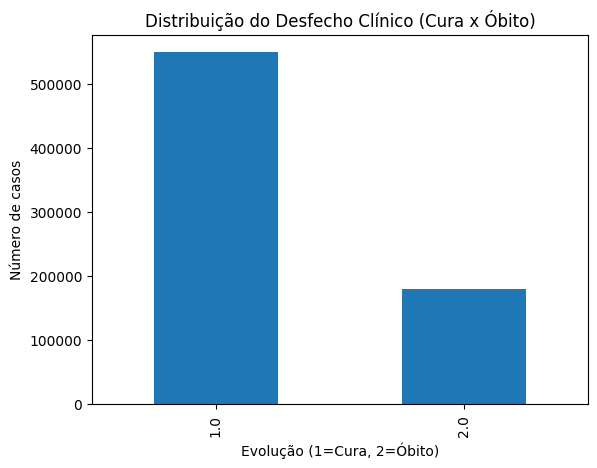

In [ ]:
# Distribuição do desfecho clínico

df['EVOLUCAO'].value_counts().plot(kind='bar')
plt.title('Distribuição do Desfecho Clínico (Cura x Óbito)')
plt.xlabel('Evolução (1=Cura, 2=Óbito)')
plt.ylabel('Número de casos')
plt.show()


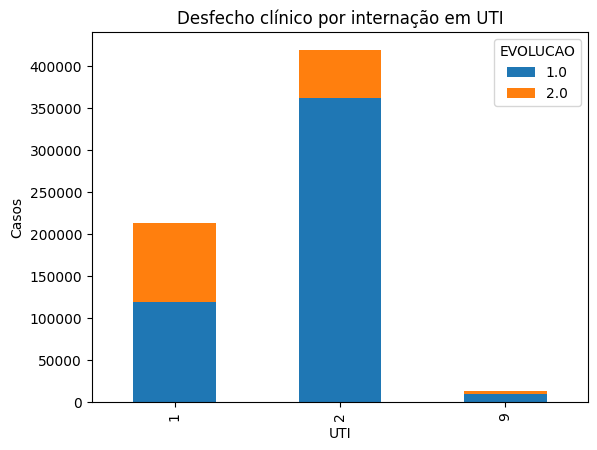

In [ ]:
# Desfecho clínico por internação em UTI

pd.crosstab(df['UTI'], df['EVOLUCAO']).plot(kind='bar', stacked=True)
plt.title('Desfecho clínico por internação em UTI')
plt.xlabel('UTI')
plt.ylabel('Casos')
plt.show()


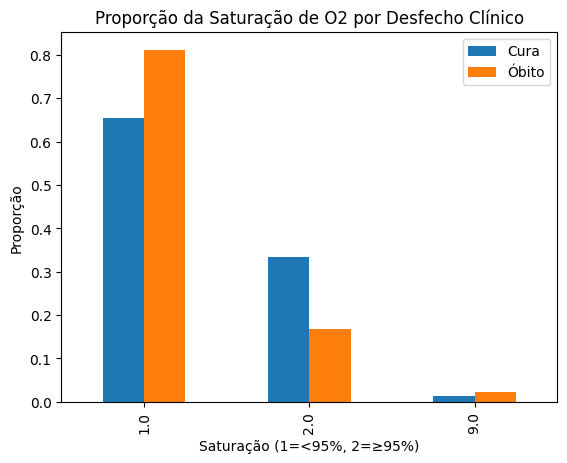

In [ ]:
# Saturação por desfecho clínico (gráfico de barras)

pd.crosstab(df['SATURACAO'], df['EVOLUCAO'], normalize='columns').plot(kind='bar')
plt.title('Proporção da Saturação de O2 por Desfecho Clínico')
plt.xlabel('Saturação (1=<95%, 2=≥95%)')
plt.ylabel('Proporção')
plt.legend(['Cura', 'Óbito'])
plt.show()


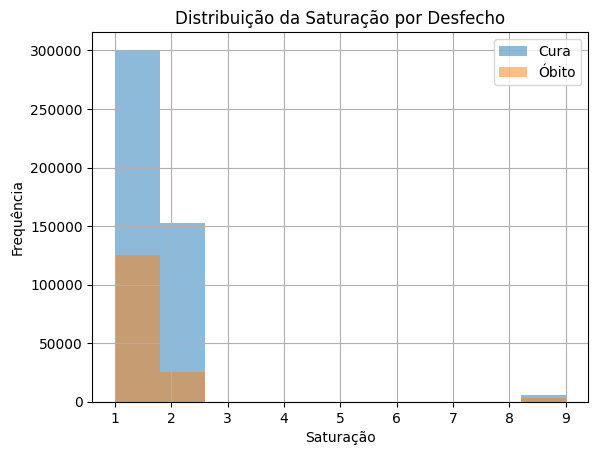

In [ ]:
# Histograma da saturação por desfecho

df[df['EVOLUCAO'] == 1]['SATURACAO'].hist(alpha=0.5, label='Cura')
df[df['EVOLUCAO'] == 2]['SATURACAO'].hist(alpha=0.5, label='Óbito')
plt.legend()
plt.title('Distribuição da Saturação por Desfecho')
plt.xlabel('Saturação')
plt.ylabel('Frequência')
plt.show()


In [ ]:

'''
Conclusões Preliminares da EDA

A análise exploratória inicial indica diferenças relevantes entre os desfechos
clínicos de cura e óbito, especialmente em variáveis relacionadas à gravidade
do quadro respiratório, como internação em UTI e saturação de oxigênio.

Observa-se também a presença de valores ausentes e codificações categóricas que
deverão ser tratadas de forma mais rigorosa na próxima etapa, visando a
modelagem preditiva com Árvore de Decisão.

#

SyntaxError: incomplete input (ipython-input-3967418193.py, line 1)